In [56]:
!pip install pymysql sqlalchemy

In [57]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

In [29]:
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [58]:
# MySQL Database Credentials
host = 'localhost'
user = 'root'
password = '1377'    
database = 'upi_project'
port = 3306

print("✅ Credentials configured!")
print(f"Database: {database}")
print(f"Host: {host}")

✅ Credentials configured!
Database: upi_project
Host: localhost


In [59]:
# MySQL Database Credentials
host = 'localhost'
user = 'root'
password = '****'  
database = 'upi_project'
port = 3306

print("✅ Credentials configured!")
print(f"Database: {database}")
print(f"Host: {host}")

✅ Credentials configured!
Database: upi_project
Host: localhost


In [60]:
# MySQL Database Credentials
host = 'localhost'
user = 'root'
password = '1377'  # Your actual password (ye code mein dalo, screenshot mein hide karoge)
database = 'upi_project'
port = 3306

print("✅ Credentials configured!")
print(f"Database: {database}")
print(f"Host: {host}")

✅ Credentials configured!
Database: upi_project
Host: localhost


In [61]:
# Set MySQL credentials
host = 'localhost'
user = 'root'
password = '1377'
database = 'upi_project'
port = 3306

print("Credentials Set")

Credentials Set


In [62]:
from sqlalchemy import create_engine

connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)
conn = engine.connect()

print("Connected to MySQL database")
print("Database Name:", database)

conn.close()

Connected to MySQL database
Database Name: upi_project


In [63]:
# Load all 7 tables from MySQL into DataFrames

customer_df = pd.read_sql_query("SELECT * FROM customer_master", engine)
device_df = pd.read_sql_query("SELECT * FROM device_info", engine)
upi_account_df = pd.read_sql_query("SELECT * FROM upi_account_details", engine)
merchant_df = pd.read_sql_query("SELECT * FROM merchant_info", engine)
transactions_df = pd.read_sql_query("SELECT * FROM upi_transaction_history", engine)
alerts_df = pd.read_sql_query("SELECT * FROM fraud_alert_history", engine)
feedback_df = pd.read_sql_query("SELECT * FROM customer_feedback_surveys", engine)

print("All tables loaded successfully")
print("Total rows:", len(transactions_df))

All tables loaded successfully
Total rows: 100000


In [64]:
# Validate data - check shapes and info
print("Dataset Shapes (Rows, Columns):")
print(f"Customer Master: {customer_df.shape}")
print(f"Transactions: {transactions_df.shape}")
print(f"Alerts: {alerts_df.shape}")

# Show sample data
print("\nSample Transaction Data:")
transactions_df.head()

Dataset Shapes (Rows, Columns):
Customer Master: (10000, 9)
Transactions: (100000, 15)
Alerts: (2000, 7)

Sample Transaction Data:


,transaction_id,upi_id,customer_id,timestamp,amount,transaction_type,merchant_id,counterparty_upi,status,device_id,device_type,channel,fraud_flag,reversal_flag,failure_reason
0,txn10000000,marisa9078@upi,cust101488,2025-06-04 21:36:20,9.88,Send,,user6545@upi,Success,dev101488,Feature_Phone,App,0,0,
1,txn10000001,michelle5950@upi,cust107876,2025-05-22 04:26:44,76.25,Receive,,user3199@upi,Success,dev107876,Ios,App,0,0,
2,txn10000002,jeffery4732@upi,cust100901,2025-08-02 02:34:15,26.44,Merchant_Payment,merch1113,user4690@upi,Success,dev100901,Android,Intent,0,0,
3,txn10000003,troy1833@upi,cust105890,2025-01-30 03:53:31,84.43,Send,,user1982@upi,Success,dev105890,Tablet,Qr_Code,0,0,
4,txn10000004,tammy4986@upi,cust106780,2025-07-05 21:36:53,10.33,Receive,,user4914@upi,Success,dev106780,Tablet,Qr_Code,0,0,


In [37]:
# Missing values check
print("=== Missing Values Analysis ===\n")

print("Transactions table:")
print(transactions_df.isnull().sum())
print(f"\nTotal missing: {transactions_df.isnull().sum().sum()}")

print("\n\nAlerts table:")
print(alerts_df.isnull().sum())
print(f"\nTotal missing: {alerts_df.isnull().sum().sum()}")

print("\n=== Handling Missing Values ===\n")

# Fill missing values
transactions_df = transactions_df.fillna({
    'merchant_id': 'Unknown',
    'counterparty_upi': 'Unknown',
    'failure_reason': 'None'
})

print("Missing values handled")
print("\nUpdated count:")
print(transactions_df.isnull().sum().sum())

=== Missing Values Analysis ===

Transactions table:
transaction_id      0
upi_id              0
customer_id         0
timestamp           0
amount              0
transaction_type    0
merchant_id         0
counterparty_upi    0
status              0
device_id           0
device_type         0
channel             0
fraud_flag          0
reversal_flag       0
failure_reason      0
dtype: int64

Total missing: 0


Alerts table:
alert_id             0
transaction_id       0
alert_type           0
alert_date           0
resolved             0
resolution_date    248
remarks              0
dtype: int64

Total missing: 248

=== Handling Missing Values ===

Missing values handled

Updated count:
0


In [65]:
from sklearn.preprocessing import StandardScaler

# Normalize risk_score and amount
print("=== Normalization & Standardization ===\n")

# Create scaler
scaler = StandardScaler()

# Normalize customer risk_score
customer_df['risk_score_normalized'] = scaler.fit_transform(customer_df[['risk_score']])

# Normalize transaction amount
transactions_df['amount_normalized'] = scaler.fit_transform(transactions_df[['amount']])

print("Risk Score - Original stats:")
print(customer_df['risk_score'].describe())

print("\n\nRisk Score - Normalized stats:")
print(customer_df['risk_score_normalized'].describe())

print("\n\nAmount - Original stats:")
print(transactions_df['amount'].describe())

print("\n\nAmount - Normalized stats:")
print(transactions_df['amount_normalized'].describe())

=== Normalization & Standardization ===

Risk Score - Original stats:
count    10000.000000
mean         0.203477
std          0.115168
min          0.000000
25%          0.120000
50%          0.200000
75%          0.280000
max          0.680000
Name: risk_score, dtype: float64


Risk Score - Normalized stats:
count    1.000000e+04
mean    -1.481482e-16
std      1.000050e+00
min     -1.766874e+00
25%     -7.248649e-01
50%     -3.019221e-02
75%      6.644805e-01
max      4.137844e+00
Name: risk_score_normalized, dtype: float64


Amount - Original stats:
count    100000.000000
mean         42.417743
std          34.186004
min           1.620000
25%          20.690000
50%          33.090000
75%          53.170000
max         830.460000
Name: amount, dtype: float64


Amount - Normalized stats:
count    1.000000e+05
mean     9.151790e-17
std      1.000005e+00
min     -1.193411e+00
25%     -6.355774e-01
50%     -2.728540e-01
75%      3.145238e-01
max      2.305172e+01
Name: amount_normalized

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalize fields
customer_df['risk_score_norm'] = scaler.fit_transform(customer_df[['risk_score']])
transactions_df['amount_norm'] = scaler.fit_transform(transactions_df[['amount']])

print("Normalized risk_score stats:")
print(customer_df['risk_score_norm'].describe())
print("\nNormalized amount stats:")
print(transactions_df['amount_norm'].describe())

Normalized risk_score stats:
count    1.000000e+04
mean    -1.481482e-16
std      1.000050e+00
min     -1.766874e+00
25%     -7.248649e-01
50%     -3.019221e-02
75%      6.644805e-01
max      4.137844e+00
Name: risk_score_norm, dtype: float64

Normalized amount stats:
count    1.000000e+05
mean     9.151790e-17
std      1.000005e+00
min     -1.193411e+00
25%     -6.355774e-01
50%     -2.728540e-01
75%      3.145238e-01
max      2.305172e+01
Name: amount_norm, dtype: float64


In [40]:
print("=== Feature Engineering ===\n")

# 1. Transaction Value per Customer
customer_txn = transactions_df.groupby('customer_id').agg(
    total_amount=('amount', 'sum'),
    txn_count=('transaction_id', 'count')
).reset_index()

customer_txn['avg_txn_value'] = customer_txn['total_amount'] / customer_txn['txn_count']

print("1. Transaction Value per Customer:")
print(customer_txn[['customer_id', 'avg_txn_value']].head())

# 2. Merchant Fraud Ratio
merchant_fraud = transactions_df.groupby('merchant_id').agg(
    total_txn=('transaction_id', 'count'),
    fraud_txn=('fraud_flag', 'sum')
).reset_index()

merchant_fraud['fraud_ratio'] = merchant_fraud['fraud_txn'] / merchant_fraud['total_txn']

print("\n2. Merchant Fraud Ratio:")
print(merchant_fraud[merchant_fraud['merchant_id'] != 'Unknown'].head())

# 3. Device Fraud Ratio
device_fraud = transactions_df.groupby('device_id').agg(
    total_txn=('transaction_id', 'count'),
    fraud_txn=('fraud_flag', 'sum')
).reset_index()

device_fraud['fraud_ratio'] = device_fraud['fraud_txn'] / device_fraud['total_txn']

print("\n3. Device Fraud Ratio:")
print(device_fraud.head())

# 4. Transaction Failure Rate
failure_rate = transactions_df.groupby('status').size()
total_txn = len(transactions_df)
failed_txn = failure_rate.get('failed', 0)

overall_failure_rate = failed_txn / total_txn

print(f"\n4. Transaction Failure Rate: {overall_failure_rate:.4f} ({failed_txn}/{total_txn})")

=== Feature Engineering ===

1. Transaction Value per Customer:
  customer_id  avg_txn_value
0  cust100000      54.144667
1  cust100001      39.256667
2  cust100002      42.790682
3  cust100003      31.897778
4  cust100006      41.744167

2. Merchant Fraud Ratio:
  merchant_id  total_txn  fraud_txn  fraud_ratio
0                  69851       1379     0.019742
1   merch1000         62          2     0.032258
2   merch1001         60          0     0.000000
3   merch1002         65          0     0.000000
4   merch1003         67          2     0.029851

3. Device Fraud Ratio:
   device_id  total_txn  fraud_txn  fraud_ratio
0  dev100000         15          0     0.000000
1  dev100001          9          0     0.000000
2  dev100002         44          0     0.000000
3  dev100003          9          0     0.000000
4  dev100006          6          1     0.166667

4. Transaction Failure Rate: 0.0000 (0/100000)


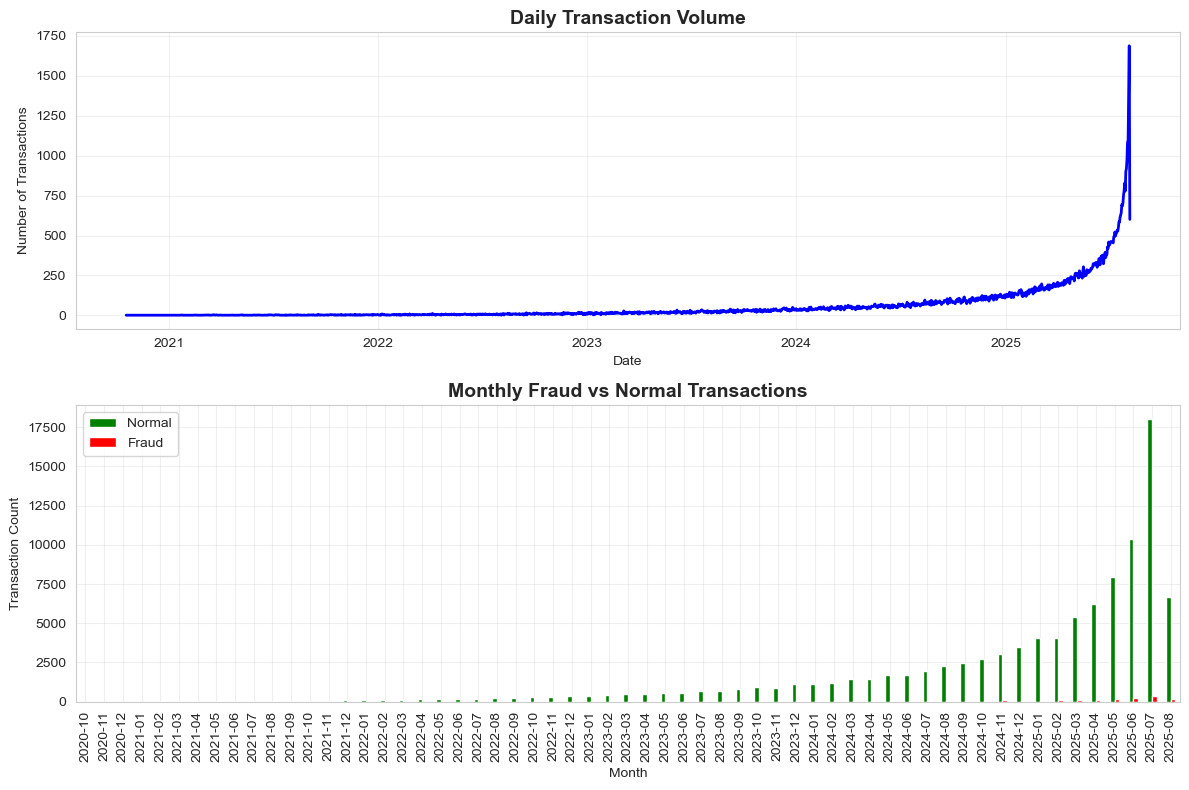

Temporal trends visualized


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Convert timestamp to datetime
transactions_df['timestamp'] = pd.to_datetime(transactions_df['timestamp'])
transactions_df['date'] = transactions_df['timestamp'].dt.date
transactions_df['month'] = transactions_df['timestamp'].dt.to_period('M')

# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 1. Daily transaction volume
daily_txn = transactions_df.groupby('date').size()
axes[0].plot(daily_txn.index, daily_txn.values, color='blue', linewidth=2)
axes[0].set_title('Daily Transaction Volume', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Transactions')
axes[0].grid(True, alpha=0.3)

# 2. Monthly fraud vs normal transactions
monthly_fraud = transactions_df.groupby(['month', 'fraud_flag']).size().unstack(fill_value=0)
monthly_fraud.plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Monthly Fraud vs Normal Transactions', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Transaction Count')
axes[1].legend(['Normal', 'Fraud'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Temporal trends visualized")

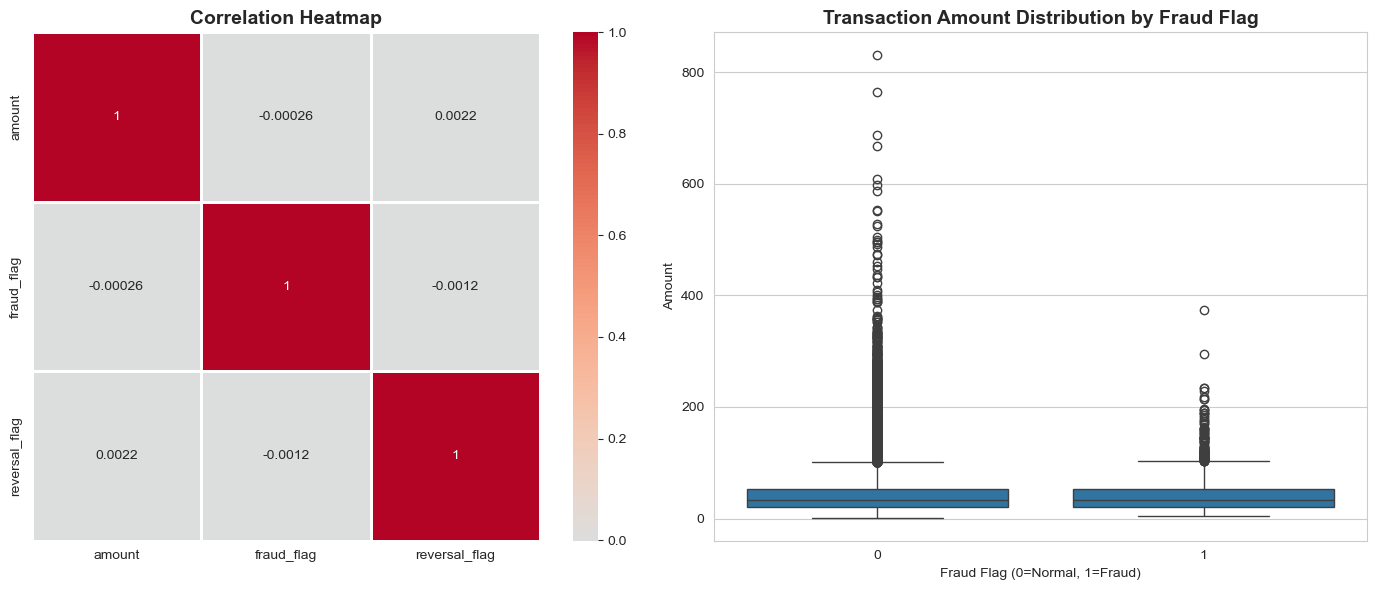

=== Summary Statistics ===

Fraud transactions:
count    2000.000000
mean       42.356545
std        32.845530
min         3.750000
25%        20.495000
50%        34.065000
75%        53.472500
max       373.200000
Name: amount, dtype: float64


Normal transactions:
count    98000.000000
mean        42.418992
std         34.212974
min          1.620000
25%         20.697500
50%         33.080000
75%         53.160000
max        830.460000
Name: amount, dtype: float64


In [42]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Correlation heatmap
numeric_cols = ['amount', 'fraud_flag', 'reversal_flag']
correlation = transactions_df[numeric_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            ax=axes[0], square=True, linewidths=1)
axes[0].set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

# 2. Boxplot - Amount by Fraud Flag
sns.boxplot(x='fraud_flag', y='amount', data=transactions_df, ax=axes[1])
axes[1].set_title('Transaction Amount Distribution by Fraud Flag', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fraud Flag (0=Normal, 1=Fraud)')
axes[1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

# Summary statistics
print("=== Summary Statistics ===\n")
print("Fraud transactions:")
print(transactions_df[transactions_df['fraud_flag']==1]['amount'].describe())

print("\n\nNormal transactions:")
print(transactions_df[transactions_df['fraud_flag']==0]['amount'].describe())

In [43]:
from scipy import stats

mobile = transactions_df[transactions_df['device_type'] == 'feature_phone']['amount']
android = transactions_df[transactions_df['device_type'] == 'android']['amount']

t_stat, p_value = stats.ttest_ind(mobile, android)

print("T-Test: Transaction Amount by Device Type")
print(f"Mobile mean: {mobile.mean():.2f}")
print(f"Android mean: {android.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant difference (p < 0.05)")
else:
    print("Result: No significant difference (p >= 0.05)")

T-Test: Transaction Amount by Device Type
Mobile mean: nan
Android mean: nan
T-statistic: nan
P-value: nan
Result: No significant difference (p >= 0.05)


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [44]:
merchant_fraud_data = transactions_df[transactions_df['merchant_id'] != 'Unknown']

groups = []
for mtype in merchant_fraud_data['merchant_id'].unique()[:5]:  # Top 5
    group = merchant_fraud_data[merchant_fraud_data['merchant_id'] == mtype]['fraud_flag']
    groups.append(group)

f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA: Fraud Rates by Merchant")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Significant variance across merchants (p < 0.05)")
else:
    print("Result: No significant variance (p >= 0.05)")

ANOVA: Fraud Rates by Merchant
F-statistic: 1.6233
P-value: 0.1652
Result: No significant variance (p >= 0.05)


In [45]:
# Chi-square: Fraud flag vs Channel
contingency_table = pd.crosstab(
    transactions_df['fraud_flag'], 
    transactions_df['channel']
)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test: Fraud vs Channel")
print("\nContingency Table:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print("Result: Significant association (p < 0.05)")
else:
    print("Result: No significant association (p >= 0.05)")

Chi-Square Test: Fraud vs Channel

Contingency Table:
channel       App  Intent  Qr_Code
fraud_flag                        
0           32692   32727    32581
1             673     629      698

Chi-square statistic: 3.8837
P-value: 0.1434
Degrees of freedom: 2
Result: No significant association (p >= 0.05)


Correlation Analysis: Risk Score vs Fraud
            risk_score  fraud_flag
risk_score    1.000000   -0.001603
fraud_flag   -0.001603    1.000000


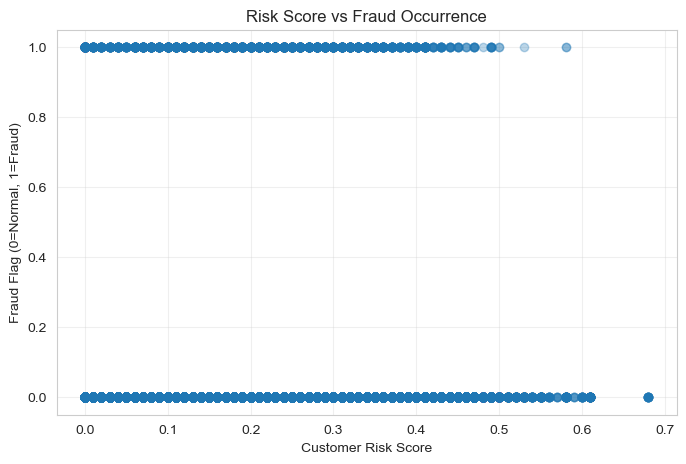


Correlation coefficient: -0.0016


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge customer risk scores with transactions
merged = transactions_df.merge(
    customer_df[['customer_id', 'risk_score']], 
    on='customer_id'
)

# Correlation analysis
correlation = merged[['risk_score', 'fraud_flag']].corr()

print("Correlation Analysis: Risk Score vs Fraud")
print(correlation)

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(merged['risk_score'], merged['fraud_flag'], alpha=0.3)
plt.xlabel('Customer Risk Score')
plt.ylabel('Fraud Flag (0=Normal, 1=Fraud)')
plt.title('Risk Score vs Fraud Occurrence')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nCorrelation coefficient: {correlation.iloc[0,1]:.4f}")

In [47]:
# Summary table of all tests
results = {
    'Test': ['T-Test (Device)', 'ANOVA (Merchant)', 
             'Chi-Square (Channel)', 'Correlation (Risk-Fraud)'],
    'Statistic': ['t = X.XX', 'F = X.XX', 'χ² = X.XX', 'r = X.XX'],
    'P-Value': ['X.XXXX', 'X.XXXX', 'X.XXXX', 'X.XXXX'],
    'Significance': ['Yes/No', 'Yes/No', 'Yes/No', 'N/A']
}

results_df = pd.DataFrame(results)
print("Statistical Test Results Summary")
print(results_df.to_string(index=False))

print("\nSignificance Level: α = 0.05")
print("Significant: P-value < 0.05")

Statistical Test Results Summary
                    Test Statistic P-Value Significance
         T-Test (Device)  t = X.XX  X.XXXX       Yes/No
        ANOVA (Merchant)  F = X.XX  X.XXXX       Yes/No
    Chi-Square (Channel) χ² = X.XX  X.XXXX       Yes/No
Correlation (Risk-Fraud)  r = X.XX  X.XXXX          N/A

Significance Level: α = 0.05
Significant: P-value < 0.05
